In [1]:
import os
import skimage
import numpy as np
from skan import draw
from skimage import io
from skimage import data
from skimage import color
from skimage import filters
from skimage.filters import *
from skimage import morphology
from skan.pre import threshold
import matplotlib.pyplot as plt
from natsort import natsorted, ns
from skimage.filters import try_all_threshold
from skan import skeleton_to_csgraph, Skeleton, summarize

(2200, 2200, 3)

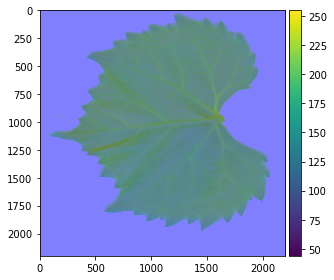

In [48]:
image = io.imread('testc.jpg')
io.imshow(image)
image.shape #automate with plantCV obj detection?

In [49]:
def identity(image, **kwargs):
    """Return the original image, ignoring any kwargs."""
    return image

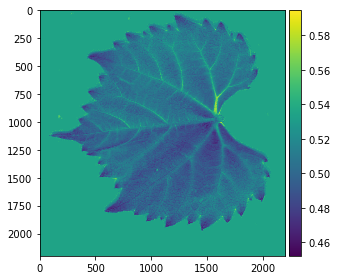

In [50]:
image = color.rgb2gray(image)#[500:1000,1000:1500]
cmap = plt.cm.gray
io.imshow(image) #true color -> grey (saturation) is best

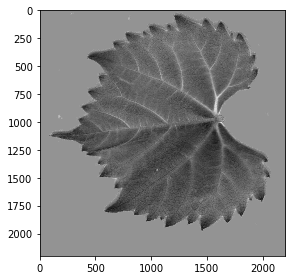

In [44]:
image = skimage.exposure.rescale_intensity(image)
io.imshow(image)

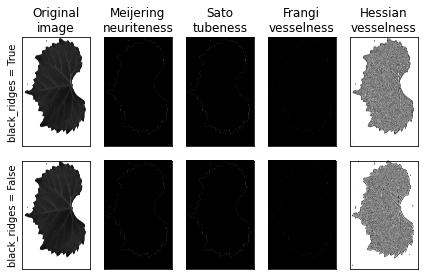

In [23]:
kwargs = {'sigmas': [1], 'mode': 'reflect'}

fig, axes = plt.subplots(2, 5)
for i, black_ridges in enumerate([1, 0]):
    for j, func in enumerate([identity, meijering, sato, frangi, hessian]):
        kwargs['black_ridges'] = black_ridges
        result = func(image, **kwargs)
        axes[i, j].imshow(result, cmap=cmap, aspect='auto')
        if i == 0:
            axes[i, j].set_title(['Original\nimage', 'Meijering\nneuriteness',
                                  'Sato\ntubeness', 'Frangi\nvesselness',
                                  'Hessian\nvesselness'][j])
        if j == 0:
            axes[i, j].set_ylabel('black_ridges = ' + str(bool(black_ridges)))
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()
fig.savefig('plot.pdf') #Sato is best

/tmp/ipykernel_6791/2780534479.py:1: FutureWarning: Previously, sato implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  veins = sato(image)


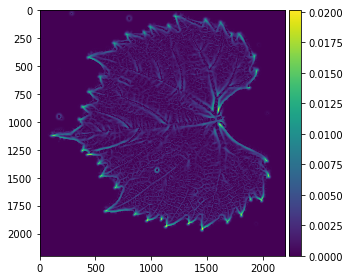

In [141]:
veins = sato(image)
io.imshow(veins) #good extraction

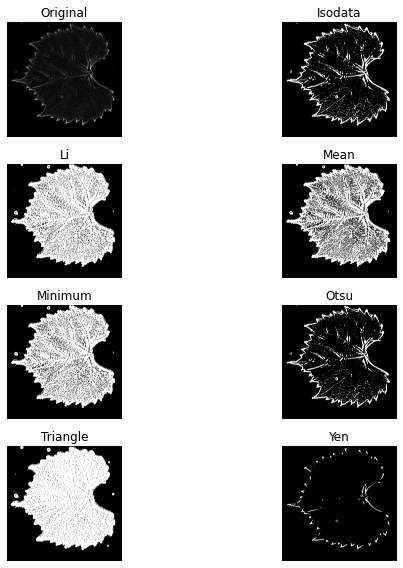

In [52]:
fig, ax = try_all_threshold(veins, figsize=(10, 8), verbose=False)
plt.show()

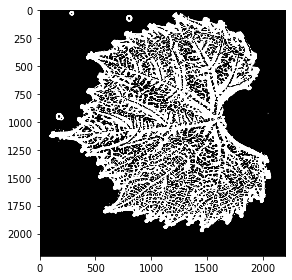

In [161]:
thresh = threshold_mean(veins)
binary0 = veins > thresh
binary0 = gaussian(binary0)
binary0 = gaussian(binary0)
io.imshow(binary0)

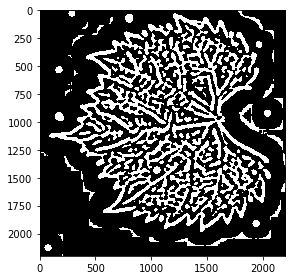

In [140]:
binary0 = threshold(veins, sigma=15,radius=10)
io.imshow(binary0) #implement a genetic algorithm for automatic value setting? 
#optimize for mean vein length in the algorithm? What is the best way to move through this space? 

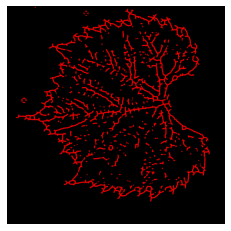

In [162]:
skeleton0 = morphology.skeletonize(binary0)
fig, ax = plt.subplots()

draw.overlay_skeleton_2d(veins, skeleton0, dilate=5, axes=ax);
#the distal vien in breaking. I think the isssue is somewhere in thresholding

In [14]:
pixel_graph, coordinates, degrees = skeleton_to_csgraph(skeleton0)

In [38]:
branch_data = summarize(Skeleton(skeleton0))
branch_data.to_csv("branch_data.csv")

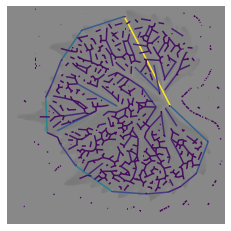

In [68]:
draw.overlay_euclidean_skeleton_2d(image, branch_data, skeleton_color_source='branch-distance');

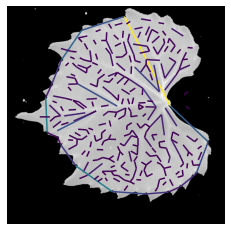

In [40]:
to_drop = list()
for index, row in branch_data.iterrows():
    if(branch_data['branch-distance'][index] < 50):
        to_drop.append(index)

pruned_data = branch_data.drop(index=to_drop) 
draw.overlay_euclidean_skeleton_2d(image, pruned_data, skeleton_color_source='branch-distance');